> 作者：曾悦 南京大学

## 1. 单变量线性回归

#### 1.1 引用：numpy，；pandas，数据处理；matplotlib，画图；

In [138]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### 1.2 加载数据

In [139]:
path =  'ex1data1.txt'
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])

#### 1.3 定义代价函数
- 代价函数：$J\left( \theta  \right)=\frac{1}{2m}\sum\limits_{i=1}^{m}{{{\left( {{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}} \right)}^{2}}}$
- 假设函数：
${{h}_{\theta }}\left( x \right)={{\theta }^{T}}X={{\theta }_{0}}{{x}_{0}}+{{\theta }_{1}}{{x}_{1}}+{{\theta }_{2}}{{x}_{2}}+...+{{\theta }_{n}}{{x}_{n}}$ 

In [140]:
def computeCost(X, y, theta):
    inner = np.power(((X * theta.T) - y), 2)
    return np.sum(inner) / (2 * len(X))

#### 1.4 数据处理

In [141]:
data.insert(0, 'Ones', 1)
cols = data.shape[1]
X = data.iloc[:,0:cols-1]         #X是所有行，去掉最后一列
y = data.iloc[:,cols-1:cols]      #X是所有行，最后一列

X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([0,0]))

#### 1.5 计算代价结果（初始时刻，$\theta =0$）

In [142]:
computeCost(X, y, theta)

32.072733877455676

#### 1.6 梯度下降算法
- 批量梯度下降：
${{\theta }_{j}}:={{\theta }_{j}}-\alpha \frac{\partial }{\partial {{\theta }_{j}}}J\left( \theta  \right)$


In [143]:
def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    
    for i in range(iters):
        error = (X * theta.T) - y
        
        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))
            
        theta = temp
        cost[i] = computeCost(X, y, theta)
        
    return theta, cost

#### 1.7 初始化参数
- 学习率：alpha；
- 迭代次数：iters；

In [144]:
alpha = 0.01
iters = 1000

#### 1.8 运行梯度下降

In [145]:
g, cost = gradientDescent(X, y, theta, alpha, iters)
computeCost(X, y, g)

4.515955503078912

#### 1.9 绘制结果：预测函数

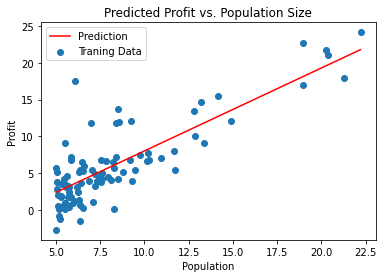

In [146]:
x = np.linspace(data.Population.min(), data.Population.max(), 100)
f = g[0, 0] + (g[0, 1] * x)

fig, ax = plt.subplots(figsize=(6,4))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')
plt.show()

#### 1.10 绘制结果：误差曲线

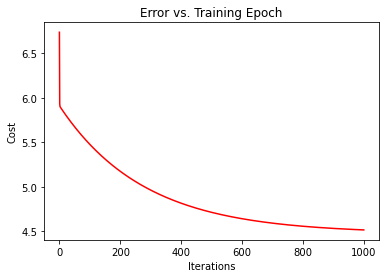

In [147]:
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
plt.show()

## 2. 多变量线性回归 

#### 2.1 加载数据

In [148]:
path =  'ex1data2.txt'
data2 = pd.read_csv(path, header=None, names=['Size', 'Bedrooms', 'Price'])
data2.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


#### 2.2 预处理数据

In [149]:
data2 = (data2 - data2.mean()) / data2.std()    #预处理：特征归一化

In [150]:
# add ones column
data2.insert(0, 'Ones', 1)    # 添加一列；

# set X (training data) and y (target variable)
cols = data2.shape[1]
X2 = data2.iloc[:,0:cols-1]
y2 = data2.iloc[:,cols-1:cols]

# convert to matrices and initialize theta
X2 = np.matrix(X2.values)
y2 = np.matrix(y2.values)
theta2 = np.matrix(np.array([0,0,0]))



#### 2.3 梯度下降

In [151]:
# perform linear regression on the data set
g2, cost2 = gradientDescent(X2, y2, theta2, alpha, iters)

# get the cost (error) of the model
computeCost(X2, y2, g2)

0.13070336960771892

#### 2.4 绘制结果：误差图

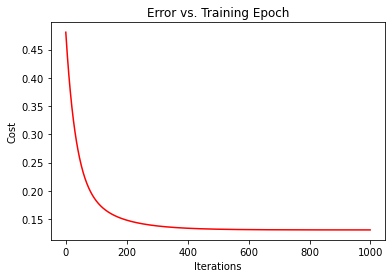

In [152]:
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(np.arange(iters), cost2, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
plt.show()

## 3. 应用scikit-learn库：线性回归函数

#### 3.1 scikit-learn 库函数：引用和使用

In [153]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X, y)

LinearRegression()

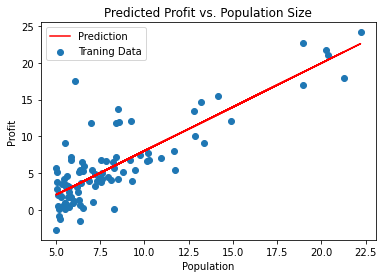

In [154]:
x = np.array(X[:, 1].A1)
f = model.predict(X).flatten()

fig, ax = plt.subplots(figsize=(6,4))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')
plt.show()

## 4. 正规方程
#### 4.1 介绍
它是一种求解线性模型的数值求解方法；

#### 4.2 求解
- 正规方程是通过求解下面的方程来找出使得代价函数最小的参数的：$\frac{\partial }{\partial {{\theta }_{j}}}J\left( {{\theta }_{j}} \right)=0$ 。
 假设我们的训练集特征矩阵为 X（包含了${{x}_{0}}=1$）并且我们的训练集结果为向量 y，则利用正规方程解出向量 $\theta ={{\left( {{X}^{T}}X \right)}^{-1}}{{X}^{T}}y$ 。
上标T代表矩阵转置，上标-1 代表矩阵的逆。设矩阵$A={{X}^{T}}X$，则：${{\left( {{X}^{T}}X \right)}^{-1}}={{A}^{-1}}$

#### 4.3 比较
- 梯度下降：需要选择学习率α，需要多次迭代，当特征数量n大时也能较好适用，适用于各种类型的模型；
- 正规方程：不需要选择学习率α，一次计算得出，需要计算 (𝑋𝑇𝑋)−1 ，如果特征数量n较大则运算代价大，因为矩阵逆的计算时间复杂度为 𝑂(𝑛3) ，通常来说当 𝑛 小于10000 时还是可以接受的，只适用于线性模型，不适合逻辑回归模型等其他模型。

In [155]:
def normalEqn(X, y):
    theta = np.linalg.inv(X.T@X)@X.T@y#X.T@X等价于X.T.dot(X)
    return theta

In [157]:
final_theta2=normalEqn(X, y)#感觉和批量梯度下降的theta的值有点差距
print(final_theta2)
print(computeCost(X, y, g))

[[-3.89578088]
 [ 1.19303364]]
4.515955503078912
